In [1]:
!pip install wget
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00481/EMG_data_for_gestures-master.zip
!unzip EMG_data_for_gestures-master.zip

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=9804c44c7a54fcea166efc7451d9893628c30b74c00af489c829be90523942d9
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
--2022-03-10 09:26:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00481/EMG_data_for_gestures-master.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17699840 (17M) [application/x-httpd-php]
Saving to: ‘EMG_data_for_gestures-master.zip’

EMG_data_for_gestur 100%[===================>]  16.88M  67.0MB/s    in 0.3s    

2022-03-10 09:26:31 (67.0 MB/s) - ‘EMG_data_for_gestures-master.zip’ saved [17699840/17699840]

Archive:  EMG_data_for_gestures-master.zip
43e8a69d7465e9bd4d22a71ed9cf621cf8d1d7b2
   creating: EMG_data_for_gestures-maste

In [2]:
import pandas as pd
from matplotlib import pylab
import numpy as np
import os
import random

## About Dataset

EMG Pattern Database

For recording patterns, we used a MYO Thalmic bracelet worn on a user’s forearm, and a PC with a Bluetooth receiver. The bracelet is equipped with eight sensors equally spaced around the forearm that simultaneously acquire myographic signals. The signals are sent through a Bluetooth interface to a PC. 
We present raw EMG data for 36 subjects while they performed series of static hand gestures.The subject performs two series, each of which consists of six (seven) basic gestures. Each gesture was performed for 3 seconds with a pause of 3 seconds between gestures.


Description of raw_data _*** file
Each file consist of 10 columns:
1) Time - time in ms;
2-9) Channel - eightEMG channels of MYO Thalmic bracelet;
10) Class  –thelabel of gestures: 
0 - unmarked data,
1 - hand at rest, 
2 - hand clenched in a fist, 
3 - wrist flexion,
4 – wrist extension,
5 – radial deviations,
6 - ulnar deviations,
7 - extended palm (the gesture was not performed by all subjects).




Relevant Paper:
Lobov S., Krilova N., Kastalskiy I., Kazantsev V., Makarov V.A. Latent Factors Limiting the Performance of sEMG-Interfaces. Sensors. 2018;18(4):1122. doi: 10.3390/s18041122

In [3]:
df = pd.read_csv('/content/EMG_data_for_gestures-master/03/2_raw_data_09-34_11.04.16.txt',sep="\t")

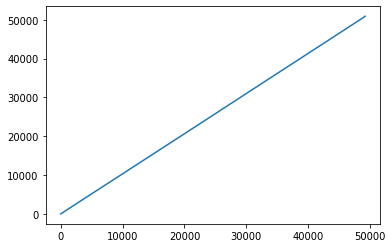

In [4]:
#jumps in time are negligible

pylab.plot(df['time'])

In [5]:
WINDOW = 100
HOP = 50

In [6]:
from pandas.io.formats.info import DataFrameTableBuilderNonVerbose
x_data = []
y_data = []
for folder in os.listdir('/content/EMG_data_for_gestures-master'):
  if folder != 'README.txt':
    for filename in os.listdir(f'/content/EMG_data_for_gestures-master/{folder}'):
      print(f'{folder}/{filename}')
      df = pd.read_csv(f'/content/EMG_data_for_gestures-master/{folder}/{filename}',sep="\t")
      x = np.zeros((((len(df)//WINDOW)-1)*(WINDOW//HOP), 8, WINDOW))
      y = np.zeros((((len(df)//WINDOW)-1)*(WINDOW//HOP), 6)) # only the classes present in all of the trials

      # transferring the data to arrays
      for i in range(0, ((len(df)//WINDOW)-1)*WINDOW, HOP):
        x[i//HOP, 0] = df['channel1'][i:i+WINDOW]
        x[i//HOP, 1] = df['channel2'][i:i+WINDOW]
        x[i//HOP, 2] = df['channel3'][i:i+WINDOW]
        x[i//HOP, 3] = df['channel4'][i:i+WINDOW]
        x[i//HOP, 4] = df['channel5'][i:i+WINDOW]
        x[i//HOP, 5] = df['channel6'][i:i+WINDOW]
        x[i//HOP, 6] = df['channel7'][i:i+WINDOW]
        x[i//HOP, 7] = df['channel8'][i:i+WINDOW]
        for j in range(6):
          y[i//HOP, j] = np.any(df['class'][i:i+WINDOW] == j)

      del df
      valid_ids = np.where(y[:,0]==0) # removing unmarked data

      x_data.append(x[valid_ids])
      y_data.append(y[valid_ids])

16/1_raw_data_12-12_25.04.16.txt
16/2_raw_data_12-14_25.04.16.txt
33/2_raw_data_09-50_12.04.16.txt
33/1_raw_data_09-49_12.04.16.txt
32/2_raw_data_12-06_27.04.16.txt
32/1_raw_data_12-04_27.04.16.txt
03/1_raw_data_09-32_11.04.16.txt
03/2_raw_data_09-34_11.04.16.txt
23/2_raw_data_13-19_05.04.16.txt
23/1_raw_data_13-18_05.04.16.txt
13/1_raw_data_13-26_21.03.16.txt
13/2_raw_data_13-29_21.03.16.txt
12/2_raw_data_11-36_28.03.16.txt
12/1_raw_data_11-35_28.03.16.txt
11/2_raw_data_13-13_18.03.16.txt
11/1_raw_data_13-11_18.03.16.txt
05/1_raw_data_10-28_30.03.16.txt
05/2_raw_data_10-29_30.03.16.txt
04/2_raw_data_18-03_24.04.16.txt
04/1_raw_data_18-02_24.04.16.txt
28/1_raw_data_12-10_15.04.16.txt
28/2_raw_data_12-11_15.04.16.txt
22/1_raw_data_12-37_28.03.16.txt
22/2_raw_data_12-39_28.03.16.txt
02/1_raw_data_14-19_22.03.16.txt
02/2_raw_data_14-21_22.03.16.txt
27/1_raw_data_12-19_06.04.16.txt
27/2_raw_data_12-20_06.04.16.txt
31/2_raw_data_11-16_11.04.16.txt
31/1_raw_data_11-15_11.04.16.txt
26/1_raw_d

In [7]:
train = random.sample(range(72), 44)
val = random.sample(list(set(range(72)) - set(train)), 14)
test = list(set(range(72)) - set(train) - set(val))

In [8]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for i in range(len(x_data)):
  if i in train:
    for row in x_data[i]:
      x_train.append(row)
    for row in y_data[i]:
      y_train.append(row)
  elif i in val:
    for row in x_data[i]:
      x_val.append(row)
    for row in y_data[i]:
      y_val.append(row)
  else:
    for row in x_data[i]:
      x_test.append(row)
    for row in y_data[i]:
      y_test.append(row)

In [9]:
x_train = np.asarray(x_train)
y_train = np.delete(np.asarray(y_train), 0, axis=1)

x_val = np.asarray(x_val)
y_val = np.delete(np.asarray(y_val), 0, axis=1)

x_test = np.asarray(x_test)
y_test = np.delete(np.asarray(y_test), 0, axis=1)

In [10]:
x_train = x_train[np.where(y_train != np.zeros(5))[0]]
y_train = y_train[np.where(y_train != np.zeros(5))[0]]

x_val = x_val[np.where(y_val != np.zeros(5))[0]]
y_val = y_val[np.where(y_val != np.zeros(5))[0]]

x_test = x_test[np.where(y_test != np.zeros(5))[0]]
y_test = y_test[np.where(y_test != np.zeros(5))[0]]

In [11]:
np.savez('/content/drive/MyDrive/emg.npz',x_train=x_train, y_train=y_train, 
         x_test=x_test, y_test=y_test,
         x_val=x_val, y_val=y_val)

In [14]:
y_train.shape

(14306, 5)

In [13]:
x_train.shape

(14306, 8, 100)